In [1]:
import pandas as pd
import matplotlib.pyplot as pt
%config IPCompleter.greedy=True
df="Telco-Customer-Churn.csv"
pd.options.display.min_rows=6
df=pd.read_csv(df,sep=",")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
import funpymodeling as fp
df_eda=fp.status(df)
df_eda

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,customerID,0,0.0,0,0.000000,7043,object
1,gender,0,0.0,0,0.000000,2,object
2,SeniorCitizen,0,0.0,5901,0.837853,2,int64
3,Partner,0,0.0,0,0.000000,2,object
4,Dependents,0,0.0,0,0.000000,2,object
5,tenure,0,0.0,11,0.001562,73,int64
6,PhoneService,0,0.0,0,0.000000,2,object
7,MultipleLines,0,0.0,0,0.000000,3,object
8,InternetService,0,0.0,0,0.000000,3,object
9,OnlineSecurity,0,0.0,0,0.000000,3,object


# IDENTIFICACION DE VARIABLES Y TIPOS

In [4]:
ls_num=["int64","float64"]
var_num=df_eda.loc[df_eda["type"].apply(lambda x: x in(ls_num))][["variable","type"]]
var_num

,variable,type
2,SeniorCitizen,int64
5,tenure,int64
18,MonthlyCharges,float64


Vamos a recodificar la variables a tipo categoricas, salvo MonthlyCharges, TotalCharges, Tenure y Churn. El caso de esta ultima, sera a int64 ya que es la identificada con target que queremos predecir y seria conveniente dejarla como numerica cuantitativa.

In [5]:
ls_num=["customerID","tenure","MonthlyCharges","TotalCharges","Churn"]
ls_cat=df.columns
ls_cat=ls_cat.drop(ls_num)
ls_cat

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

Recodificamos todas las variables alojadas en ls_cat en categoricas

In [6]:
for col in ls_cat:
    df[col]=df[col].astype("category")

df.dtypes

customerID            object
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges          object
Churn                 object
dtype: object

Reconvertimos TotalCharges a tipo numerico (float64), y borramos la variables temporales dff y dfft

In [7]:
dff=df
dff=pd.DataFrame(df["TotalCharges"].str.replace(pat=",",repl="."))
dff=pd.DataFrame(pd.to_numeric(dff["TotalCharges"],errors="coerce"))

dfft=df.drop(columns=["TotalCharges"])
dfft["TotalCharges"]=dff["TotalCharges"]
df=dfft
del dfft,dff
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,No,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,108.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No,346.45
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes,306.60
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,No,6844.50


Hacemos los mismo con la variable Churn, solo que esta la reconvertimos a int64. Primero vemos los valores de Churn

In [8]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Deberiamos recodificar la variable para que tome valores 0 y 1. Luego de ello reconvertiremos la variable para que sea de tipo categorica

In [9]:
def verifica(val):
    if val=="No":
        return 0
    elif val=="Yes":
        return 1
        
df["Churn"]=df["Churn"].map(verifica)
df["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [10]:
df_eda=fp.status(df)
df_eda

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,customerID,0,0.000000,0,0.000000,7043,object
1,gender,0,0.000000,0,0.000000,2,category
2,SeniorCitizen,0,0.000000,5901,0.837853,2,category
3,Partner,0,0.000000,0,0.000000,2,category
4,Dependents,0,0.000000,0,0.000000,2,category
5,tenure,0,0.000000,11,0.001562,73,int64
6,PhoneService,0,0.000000,0,0.000000,2,category
7,MultipleLines,0,0.000000,0,0.000000,3,category
8,InternetService,0,0.000000,0,0.000000,3,category
9,OnlineSecurity,0,0.000000,0,0.000000,3,category


In [11]:
ls_obj=["object"]
var_obj=df_eda.loc[df_eda["type"].apply(lambda x: x in(ls_obj))][["variable","type"]]
var_obj

,variable,type
0,customerID,object


Ahora podriamos empezar a analizar las variables como corresponde. Primero nos enfocaremos en las numericas. Queremos descartar cualquier correlacion que pudiera existir entre ellas

In [12]:
import numpy as np
(print("Promedio de cargas mensuales de los nulos en TotalCharges: ", 
       np.round(df.loc[df["TotalCharges"].isna()]["MonthlyCharges"].agg("mean"),2)))

(print("La antiguedad de estos casos en promedio es: ", 
      df.loc[df["TotalCharges"].isna()]["tenure"].agg("mean")))

Promedio de cargas mensuales de los nulos en TotalCharges:  41.42
La antiguedad de estos casos en promedio es:  0.0


Se observa que la antiguedad es nula. Es decir, son clientes nuevos sin historial. No llegan al 1% de los datos, con lo cual obviarlos es indistinto

Imputamos los NaN en TotalCharges por la media.

In [13]:
df["TotalCharges"].fillna(value=41.42,inplace=True)

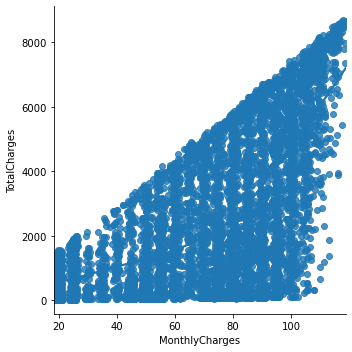

In [14]:
import seaborn as sns
sns.lmplot(data=df, x="MonthlyCharges", y="TotalCharges", lowess=True);

Se Observa una relacion lineal bastante marcada. Corroboramos tambien con un R2

In [15]:
import numpy as np
import scipy as sp
np.round(sp.stats.pearsonr(df["MonthlyCharges"], df["TotalCharges"])[0],2)

0.65

Analizamos el comportamiento de la target Churn con respecto a distintas variables categoricas ya alojadas en ls_cat

In [16]:
for cat in ls_cat:
    print("---- ", cat," ----\n")
    print(pd.crosstab(df["Churn"],df[cat]),"\n\n")

----  gender  ----

gender  Female  Male
Churn               
0         2549  2625
1          939   930 


----  SeniorCitizen  ----

SeniorCitizen     0    1
Churn                   
0              4508  666
1              1393  476 


----  Partner  ----

Partner    No   Yes
Churn              
0        2441  2733
1        1200   669 


----  Dependents  ----

Dependents    No   Yes
Churn                 
0           3390  1784
1           1543   326 


----  PhoneService  ----

PhoneService   No   Yes
Churn                  
0             512  4662
1             170  1699 


----  MultipleLines  ----

MultipleLines    No  No phone service   Yes
Churn                                      
0              2541               512  2121
1               849               170   850 


----  InternetService  ----

InternetService   DSL  Fiber optic    No
Churn                                   
0                1962         1799  1413
1                 459         1297   113 


----  OnlineS

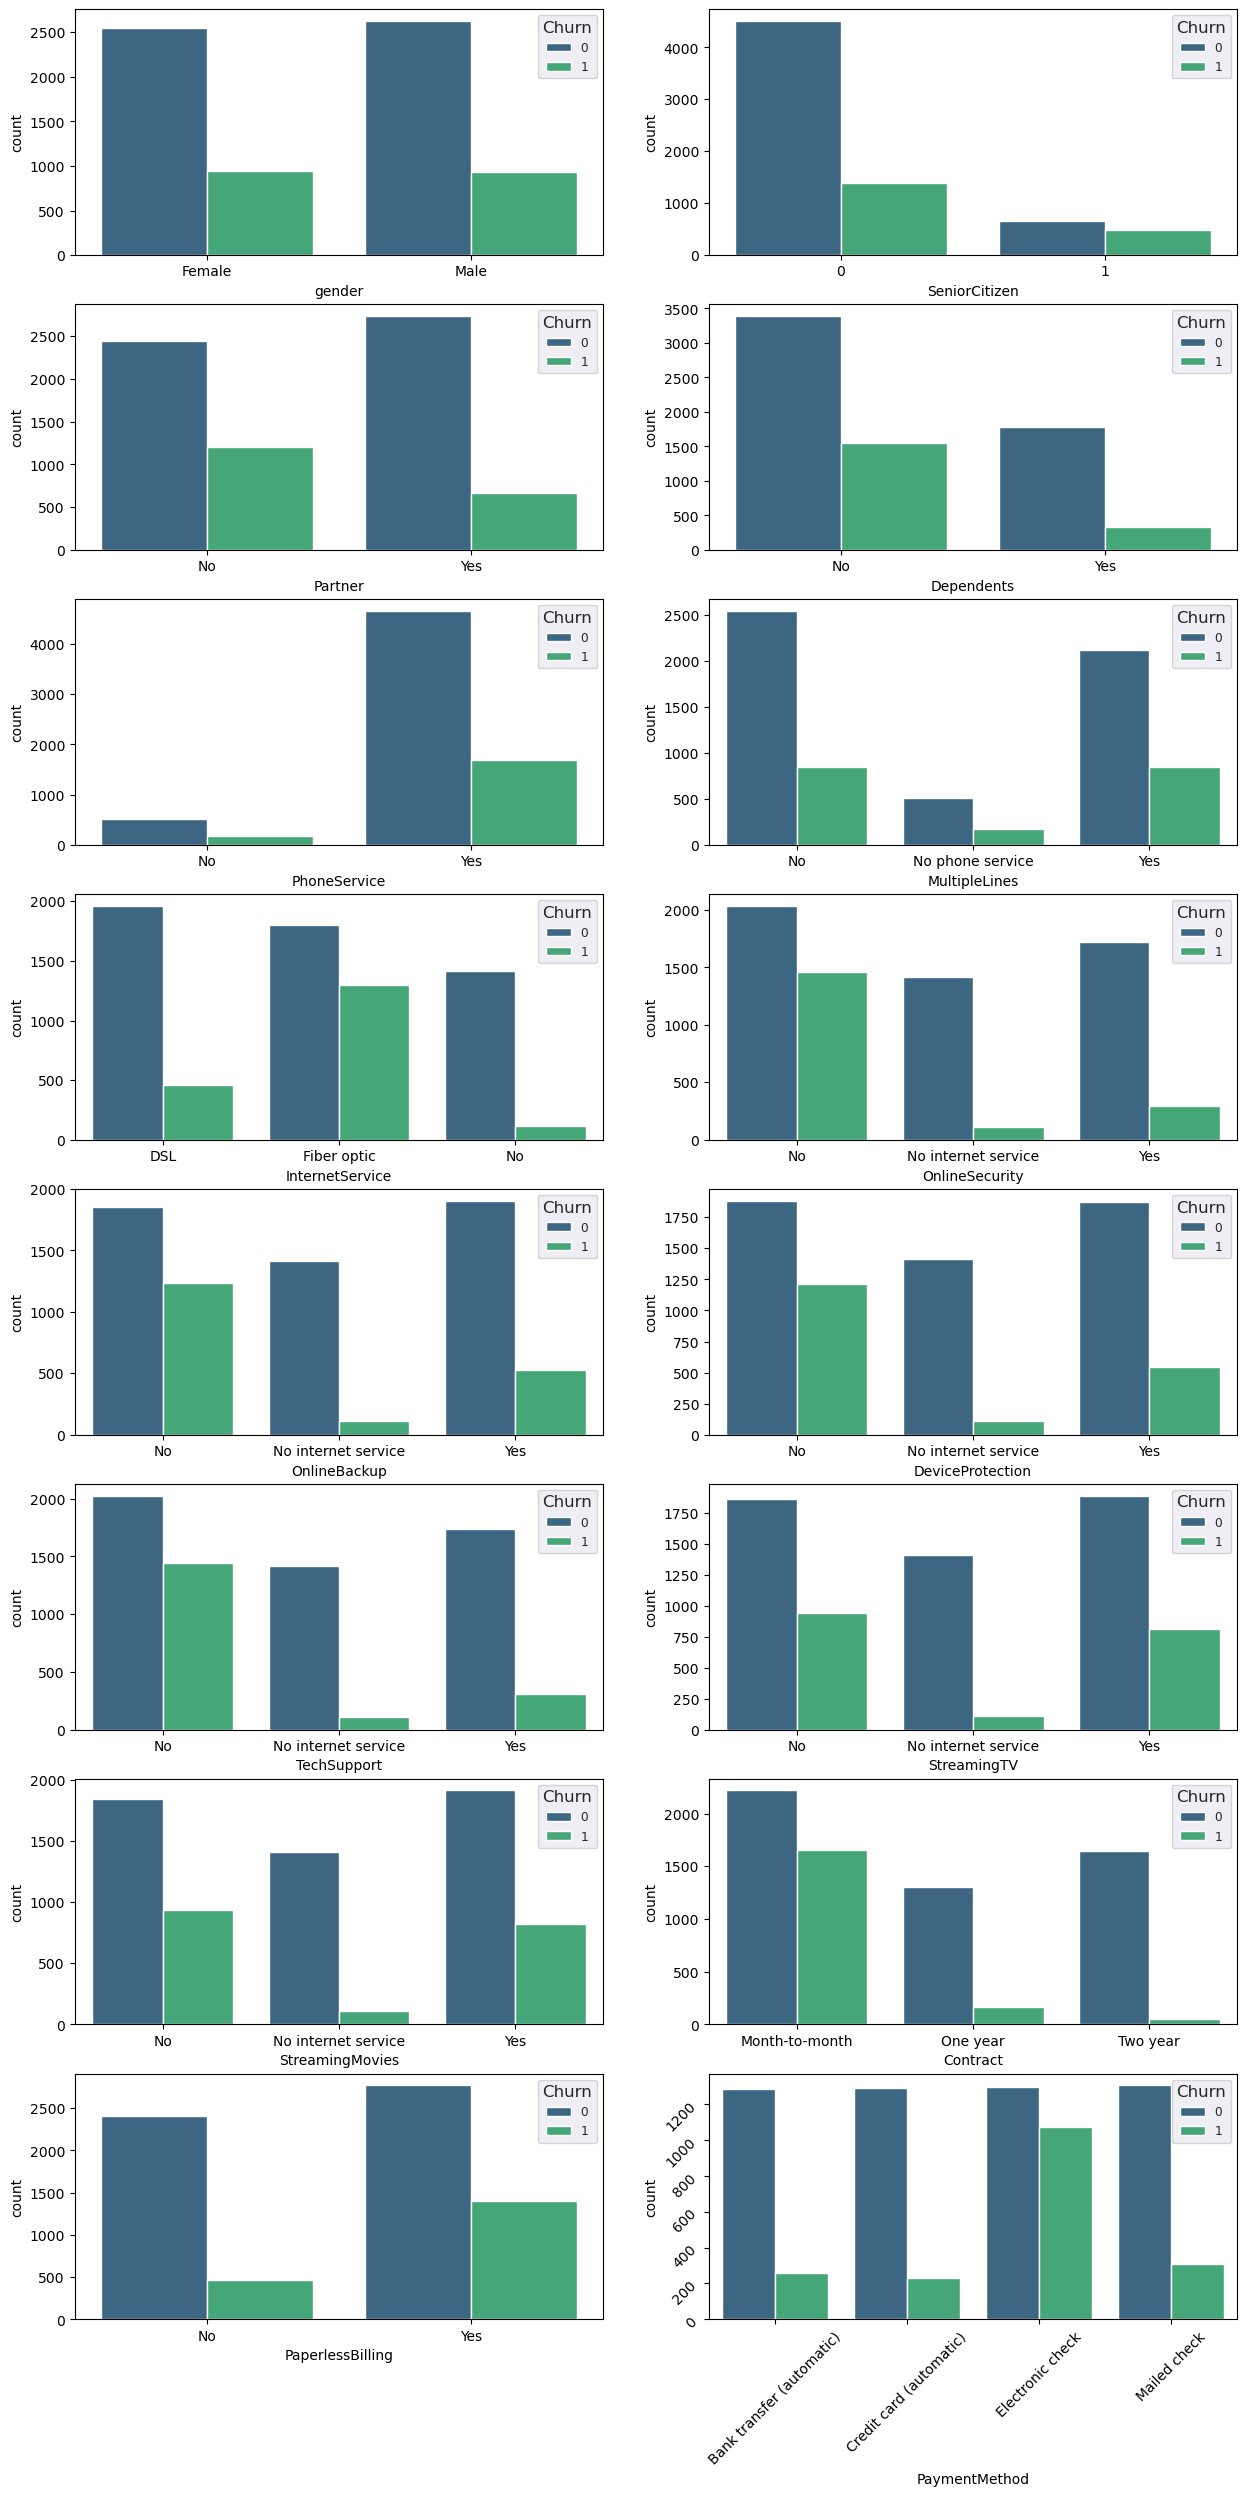

In [17]:
sns.reset_defaults()
f, ax=pt.subplots(nrows=8,ncols=2,figsize = (15,30))

i=0
for row in range(0,8,1):
    sns.set(font_scale=0.8)
    pt.tick_params(labelsize=10, labelrotation=45)
    
    for col in range(0,2,1):
        sns.countplot(ax=ax[row,col],data=df, x=ls_cat[i],hue="Churn",palette="viridis")
        i+=1
sns.reset_defaults()

Algunas conclusiones:
    - Hombres y Mujeres tienen una tasa de abandono similar.
    - La tasa de abandono es bastante alta para clientes con contratos de mes a mes. (Restaria chequear el genero en estos contratos).
    - Los Jubilados tienen una tasa de abandono baja. Con lo cual, podriamos obviar esta variable.
    - Las personas que tiene familiares a cargo, tienen una tasa mas baja de abandono que aquellos que no tienen familiares a cargo.
    - Los solteros tienen una tasa de abandono mas alta que las parejas.
    - Los clientes con Fibra Optica abandonan con una tasa mas alta (podria haber una falencia en ese servicio).
    - Los clientes con un servicio mas basico (es decir sin OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV) tienen una tasa de abandono mas alta que aquellos que poseen el servicio.
    - Los clientes adheridos a factura electronica tiene una tasa de abandono mas alta que los demas. 

Chequeamos los tipos de contratos

In [18]:
df.loc[df["Churn"]==1].groupby(["gender","Contract"])[["Churn"]].agg("count")

Churn
gender Contract             
Female Month-to-month    842
       One year           75
       Two year           22
Male   Month-to-month    813
       One year           91
       Two year           26

El abandono es similar tanto en hombres como en mujeres. Predominando en contratos de mes a mes

Vamos a recodificar las variables categoricas a numericas

In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,0,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1,151.65


In [20]:
ls_cat

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [21]:
df["TechSupport"].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [22]:
dff=df.copy()

cat_0=[0,"No","No internet service","No phone service","Female"]
cat_1=[1,"Yes","Fiber optic","DSL","Male"]

ls_reco=ls_cat.drop(["SeniorCitizen","Contract","PaymentMethod"])

def reco(val):
    if val in cat_0:
        return 0
    elif val in cat_1:
        return 1
    
dff=pd.DataFrame([dff[cat].map(reco) for cat in ls_reco]).T


In [23]:
dft=df.copy()
dft.drop(columns=ls_reco,inplace=True)
dft=pd.concat([dft,dff],axis="columns")
dft

,customerID,SeniorCitizen,tenure,Contract,PaymentMethod,MonthlyCharges,Churn,TotalCharges,gender,Partner,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,7590-VHVEG,0,1,Month-to-month,Electronic check,29.85,0,29.85,0,1,...,0,0,1,0,1,0,0,0,0,1
1,5575-GNVDE,0,34,One year,Mailed check,56.95,0,1889.50,1,0,...,1,0,1,1,0,1,0,0,0,0
2,3668-QPYBK,0,2,Month-to-month,Mailed check,53.85,1,108.15,1,0,...,1,0,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7040,4801-JZAZL,0,11,Month-to-month,Electronic check,29.60,0,346.45,0,1,...,0,0,1,1,0,0,0,0,0,1
7041,8361-LTMKD,1,4,Month-to-month,Mailed check,74.40,1,306.60,1,1,...,1,1,1,0,0,0,0,0,0,1
7042,3186-AJIEK,0,66,Two year,Bank transfer (automatic),105.65,0,6844.50,1,0,...,1,0,1,1,0,1,1,1,1,1


In [24]:
print(dft["tenure"].quantile([0,0.25,0.5,0.75,1]),"\n\n")
print(dft["TotalCharges"].quantile([0,0.25,0.5,0.75,1]))

0.00     0.0
0.25     9.0
0.50    29.0
0.75    55.0
1.00    72.0
Name: tenure, dtype: float64 


0.00      18.80
0.25     398.55
0.50    1394.55
0.75    3786.60
1.00    8684.80
Name: TotalCharges, dtype: float64
